In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy import linalg as LA
from scipy import stats as stats
from PIL import Image
plt.style.use("ggplot")

In [3]:
from sklearn.utils import extmath
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

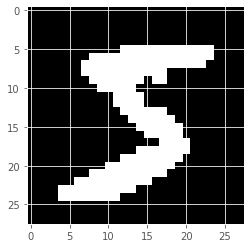

In [4]:
x = np.array(mnist.data != 0)
plt.imshow(x[0].reshape(28,28), cmap="gray", interpolation="none")
plt.show()

In [1]:
def logsumexp(arr, axis=0):
    """Computes the sum of arr assuming arr is in the log domain.
    Returns log(sum(exp(arr))) while minimizing the possibility of
    over/underflow.
    Examples
    --------
    >>> import numpy as np
    >>> from sklearn.utils.extmath import logsumexp
    >>> a = np.arange(10)
    >>> np.log(np.sum(np.exp(a)))
    9.4586297444267107
    >>> logsumexp(a)
    9.4586297444267107
    """
    arr = np.rollaxis(arr, axis)
    # Use the max to normalize, as with the log this is what accumulates
    # the less errors
    vmax = arr.max(axis=0)
    out = np.log(np.sum(np.exp(arr - vmax), axis=0))
    out += vmax
    return out

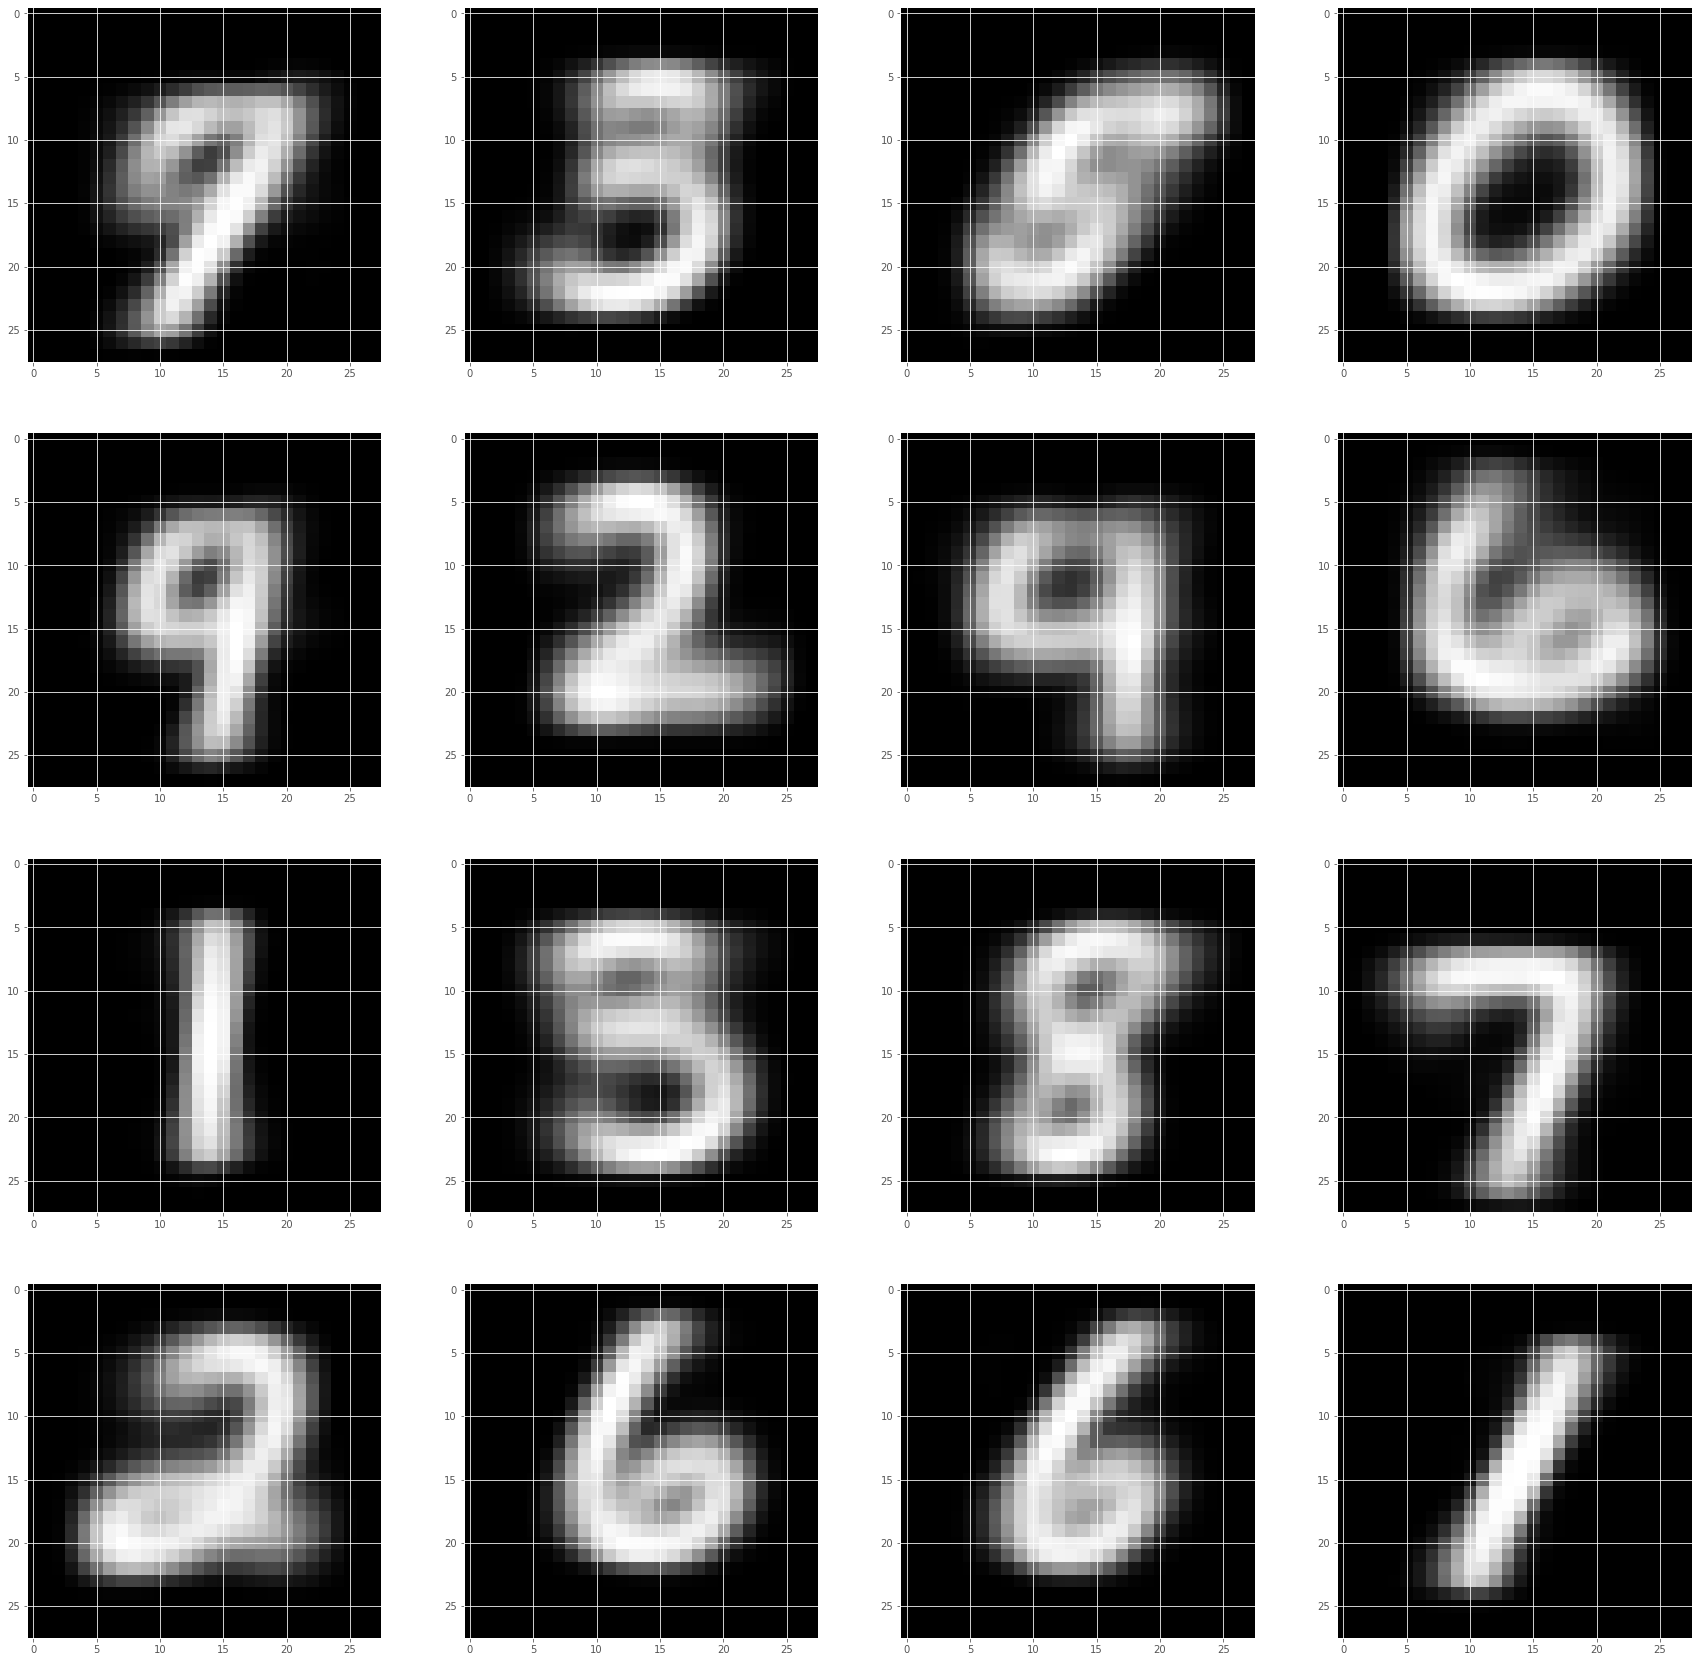

In [6]:
K = 16
N = x.shape[0]
M = x.shape[1]

pi = np.ones(K) / K
p = np.random.uniform(0.2, 0.8, size=(K,M))

for i in range(100):
  # E step
  tmp = np.log(pi) + x.dot(np.ma.log(p.T)) + (1-x).dot(np.ma.log(1 - p.T)) # (N, K)
  tmp -= logsumexp(tmp, 1)[:, np.newaxis] #(N,K)
  r = np.exp(tmp) #(N,K)

  new_pi = r.sum(0) / N
  p = r.T.dot(x) / r.sum(0)[:,np.newaxis]

  if LA.norm(new_pi - pi) / LA.norm(pi) < 0.01:
    break

pi = new_pifig, axes = plt.subplots(4, 4, figsize=(30, 30))
for i in range(4):
    for j in range(4):
        k = i * 4 + j
        axes[i,j].imshow(p[k].reshape(28, 28), cmap="gray", interpolation='none')  

In [10]:
tmp.shape

(70000, 16)